<a href="https://colab.research.google.com/github/deeprajbrahma123/Stock-Price-Predicton/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock Price Prediction

##Importing of libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

##Extraction do DataFrame

In [19]:
df=pd.read_csv('stock_price_data_set.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


**Since we can see we don't have any null values so we can proceed**

##Changing the dtype of 'Date' to datetime

In [20]:
df['Date']=pd.to_datetime(df['Date'])
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


##Checking the time frame and total no. of days in the dataframe

In [21]:
print(f'Time frame from {df.Date.min()} to {df.Date.max()}')
print(f'Total No. of days = {(df.Date.max() - (df.Date.min())).days} days')

Time frame from 2018-02-05 00:00:00 to 2022-02-04 00:00:00
Total No. of days = 1460 days


##Visualizing the Data using Box Plot

<Axes: >

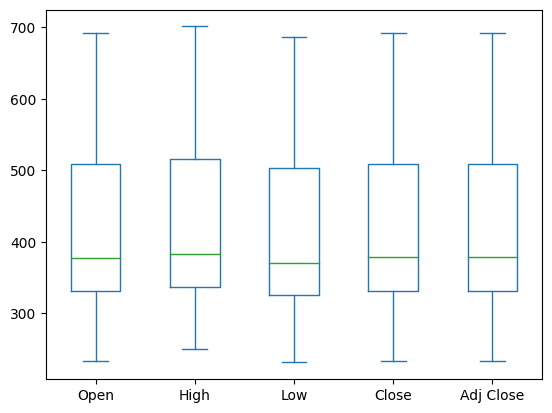

In [22]:
df[['Date','Open','High','Low','Close','Adj Close']].plot(kind='box')

##Visualizing the change of price of stock with time

In [23]:
import plotly.graph_objs as go
from plotly.offline import iplot
layout1 = go.Layout(title='Stock Price',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Price')
                   )
data_set=[{'x':df['Date'],'y':df['Close']}]
plot=go.Figure(data=data_set,layout=layout1)
iplot(plot)

##Splitting the dataset into the Training set and Test set

In [24]:
from sklearn.model_selection import train_test_split
x=np.array(df.index).reshape(-1,1)
y=df['Close']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

##Training the Linear Regression model on the Training set

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc = sc.fit(x_train)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

##Visualising the Linear Regression results

In [26]:
import plotly.graph_objs as go
from plotly.offline import iplot
layout2 = go.Layout(title='Stock Price Actual vs Predicted Value',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Price')
                   )

In [27]:
trace0=go.Scatter(
    x=x_train.T[0],
    y=y_train,
    mode='markers',
    name='Actual'
)
trace1=go.Scatter(
    x=x_train.T[0],
    y=regressor.predict(x_train).T,
    mode='lines',
    name='Predicted'
)
df = [trace0,trace1]
layout2.xaxis.title.text='Day'
plot2=go.Figure(data=df,layout=layout2)
iplot(plot2)

##Calculating the mean_squared_error & r2_Score

In [28]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

scores= f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train,regressor.predict(x_train))}\t{r2_score(y_test,regressor.predict(x_test))}
{'MSE'.ljust(10)}{mse(y_train,regressor.predict(x_train))}\t{mse(y_test, regressor.predict(x_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.6983675949615704	0.7251307098412487
MSE       3378.540256001015	3532.005120487623

